<a href="https://colab.research.google.com/github/hyhnuka/ML/blob/main/Copy_of_tugas01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
# Selalu awali dengan import-import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [53]:
# Load data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


In [54]:
# Hapus baris indeks 1001 sampai 2627
df_new = df.drop(df.index[1001:2627])

print(df_new)

df_new.info()



          ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
0     458989  Female          Yes   36       Yes    Engineer              0.0   
1     458994    Male          Yes   37       Yes  Healthcare              8.0   
2     458996  Female          Yes   69        No         NaN              0.0   
3     459000    Male          Yes   59        No   Executive             11.0   
4     459001  Female           No   19        No   Marketing              NaN   
...      ...     ...          ...  ...       ...         ...              ...   
996   462304    Male          Yes   56       Yes      Artist              1.0   
997   462306    Male          Yes   83        No      Lawyer              8.0   
998   462309    Male           No   32       Yes  Healthcare              NaN   
999   462310    Male          Yes   63       Yes      Artist              5.0   
1000  462323  Female          Yes   71       Yes      Doctor              1.0   

     Spending_Score  Family

In [55]:
print(df.isna().sum())  # Mengecek jumlah NaN

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64


In [56]:
# Menghapus row yang terdapat NaN
df_clean = df_new.dropna()

print(df_clean.isna().sum())  # Mengecek NaN setelah pembersihan

print("Data duplicated:", df_clean.duplicated().sum())  # Mengecek duplikasi setelah pembersihan


ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64
Data duplicated: 0


In [57]:
# Mengubah nilai string ke numerik
from sklearn.preprocessing import LabelEncoder

# Simpan LabelEncoder untuk setiap kolom dalam dictionary
label_encoders = {}

cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']  # Kolom kategori

for col in cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le  # Simpan encoder agar bisa dibalik

# Cek hasil encoding
print(df_clean.info())
print(df_clean.head())

<class 'pandas.core.frame.DataFrame'>
Index: 802 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               802 non-null    int64  
 1   Gender           802 non-null    int64  
 2   Ever_Married     802 non-null    int64  
 3   Age              802 non-null    int64  
 4   Graduated        802 non-null    int64  
 5   Profession       802 non-null    int64  
 6   Work_Experience  802 non-null    float64
 7   Spending_Score   802 non-null    int64  
 8   Family_Size      802 non-null    float64
 9   Var_1            802 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 68.9+ KB
None
       ID  Gender  Ever_Married  Age  Graduated  Profession  Work_Experience  \
0  458989       0             1   36          1           2              0.0   
1  458994       1             1   37          1           5              8.0   
3  459000       1             1   59   

In [58]:
#cek nilai integer
print("Gender:", df_clean['Gender'].unique())
print("Ever Married:", df_clean['Ever_Married'].unique())
print("Graduated:", df_clean['Graduated'].unique())
print("Profession:", df_clean['Profession'].unique())
print("Spending Score:", df_clean['Spending_Score'].unique())

Gender: [0 1]
Ever Married: [1 0]
Graduated: [1 0]
Profession: [2 5 4 1 0 7 3 6 8]
Spending Score: [2 0 1]


In [59]:

print("\nGender:")
for index, class_name in enumerate(label_encoders['Gender'].classes_):
    print(f"{class_name} --> {index}")
print("\nEver married:")
for index, class_name in enumerate(label_encoders['Ever_Married'].classes_):
    print(f"{class_name} --> {index}")
print("\nGraduated:")
for index, class_name in enumerate(label_encoders['Graduated'].classes_):
    print(f"{class_name} --> {index}")
print("\nProfession:")
for index, class_name in enumerate(label_encoders['Profession'].classes_):
    print(f"{class_name} --> {index}")
print("\nSpending score:")
for index, class_name in enumerate(label_encoders['Spending_Score'].classes_):
    print(f"{class_name} --> {index}")



Gender:
Female --> 0
Male --> 1

Ever married:
No --> 0
Yes --> 1

Graduated:
No --> 0
Yes --> 1

Profession:
Artist --> 0
Doctor --> 1
Engineer --> 2
Entertainment --> 3
Executive --> 4
Healthcare --> 5
Homemaker --> 6
Lawyer --> 7
Marketing --> 8

Spending score:
Average --> 0
High --> 1
Low --> 2


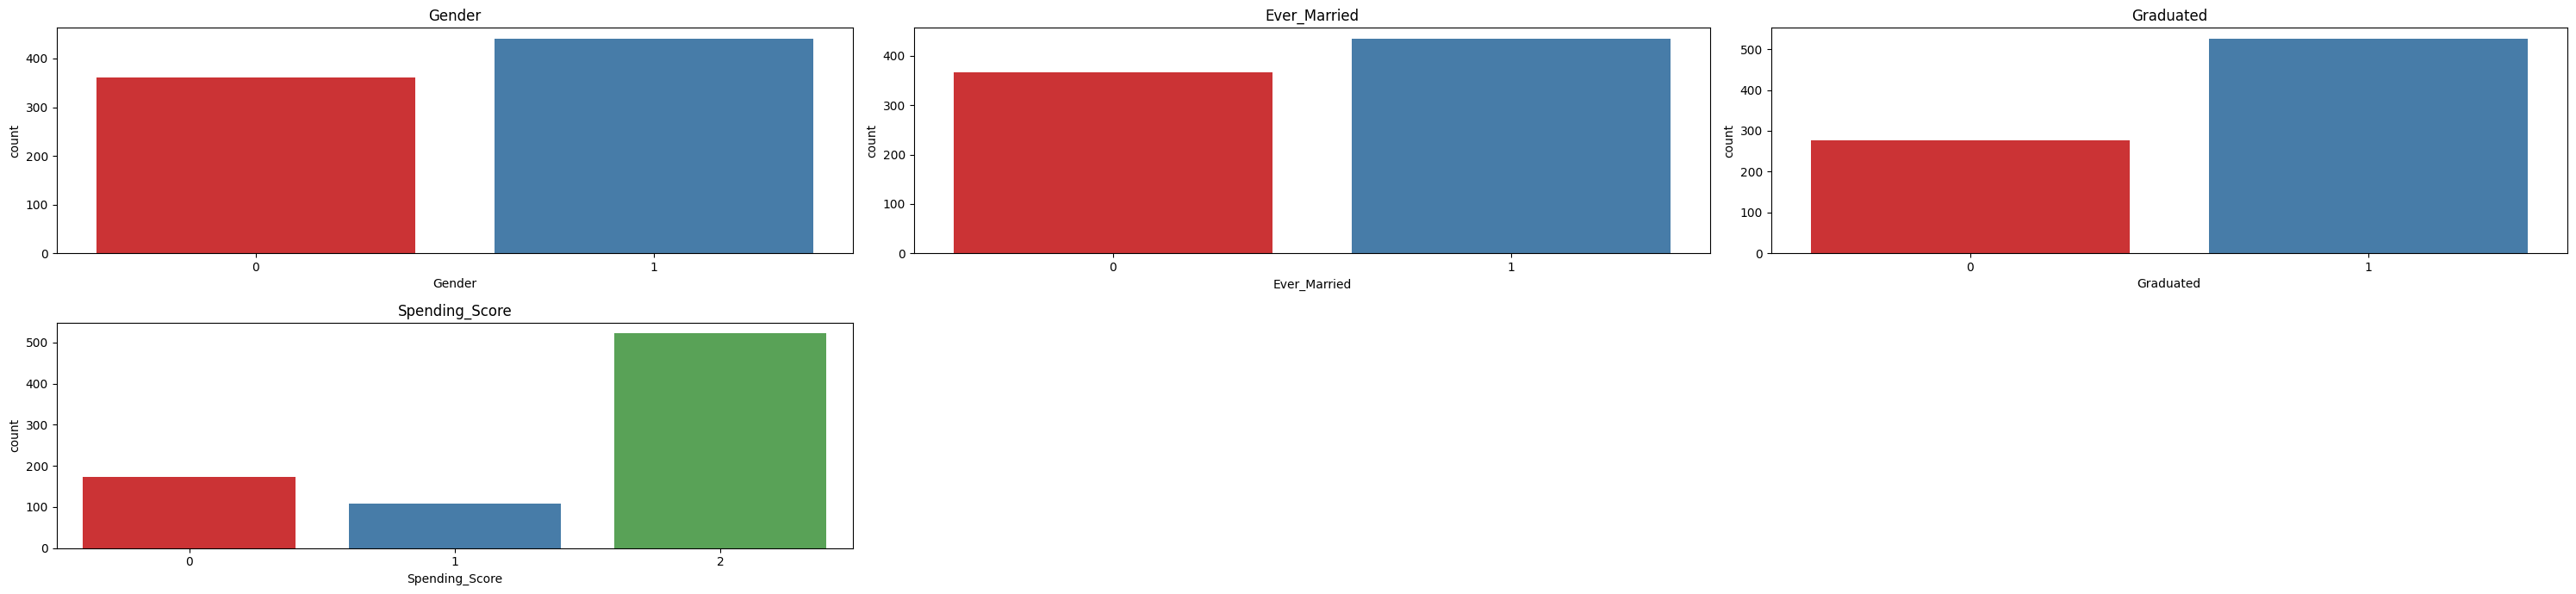

In [60]:
# Kita coba visualisasi data pada kolom

kolom_1 = ['Gender', 'Ever_Married', 'Graduated', 'Spending_Score']


color_palette = sns.color_palette("Set1", len(kolom_1))

plt.figure(figsize=(30, 7))
for i, column in enumerate(kolom_1, 1):
    plt.subplot((len(kolom_1)//3)+1, 3, i)
    sns.countplot(data=df_clean, x=column, palette=color_palette)
    plt.title(column)

plt.tight_layout()
plt.show()

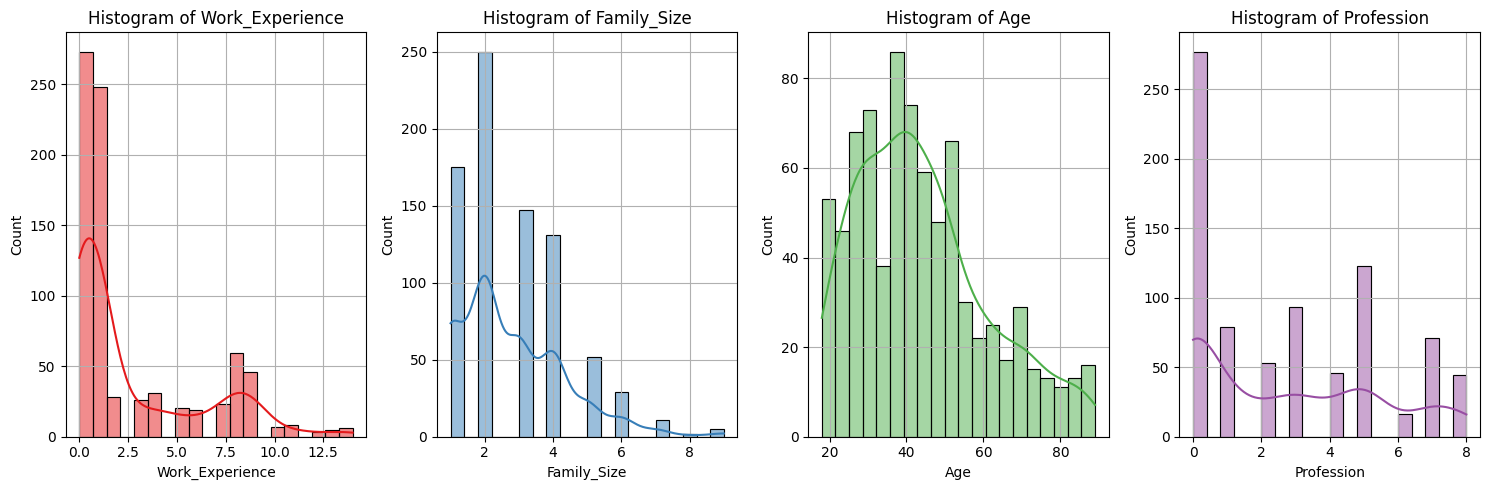

In [61]:
# Kita coba visualisasi data pada kolom
import seaborn as sns
import matplotlib.pyplot as plt

# Kolom numerik yang akan divisualisasikan
kolom_1 = ['Work_Experience', 'Family_Size', 'Age', 'Profession']

# Warna untuk tiap plot
color_palette = sns.color_palette("Set1", len(kolom_1))

plt.figure(figsize=(15, 5))
for i, column in enumerate(kolom_1, 1):
    plt.subplot(1, len(kolom_1), i)
    sns.histplot(df_clean[column], bins=20, kde=True, color=color_palette[i-1])
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")  # Menampilkan jumlah kemunculan dalam rentang nilai
    plt.grid(True)

plt.tight_layout()
plt.show()



In [17]:
df_clean

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,0,1,36,1,2,0.0,2,1.0,Cat_6
1,458994,1,1,37,1,5,8.0,0,4.0,Cat_6
3,459000,1,1,59,0,4,11.0,1,2.0,Cat_6
5,459003,1,1,47,1,1,0.0,1,5.0,Cat_4
6,459005,1,1,61,1,1,5.0,2,3.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
995,462300,1,1,49,1,0,1.0,0,3.0,Cat_6
996,462304,1,1,56,1,0,1.0,2,4.0,Cat_4
997,462306,1,1,83,0,7,8.0,1,2.0,Cat_6
999,462310,1,1,63,1,0,5.0,0,4.0,Cat_6


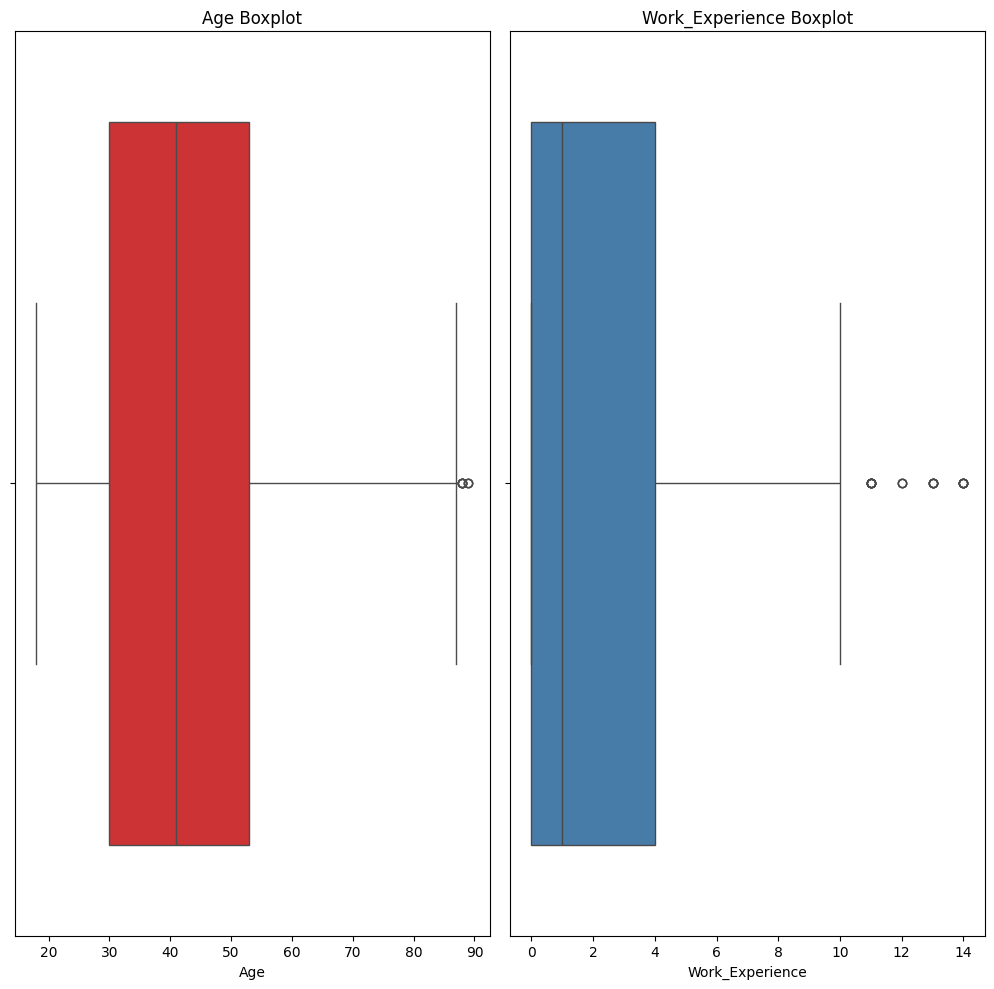

In [62]:

# Sekarang kita coba visualisasi data Age dan Work Experience (Menggunakan Box Plot)

kolom_2 = ['Age', 'Work_Experience']

color_palette = sns.color_palette("Set1", len(kolom_2))
plt.figure(figsize = (15, 10))

for i, column in enumerate(kolom_2, 1):
    plt.subplot((len(kolom_2)//3)+1, 3, i)
    sns.boxplot(data=df_clean, x=column, color=color_palette[i - 1])
    plt.xlabel(column)
    plt.title(f'{column} Boxplot')

plt.tight_layout()
plt.show()

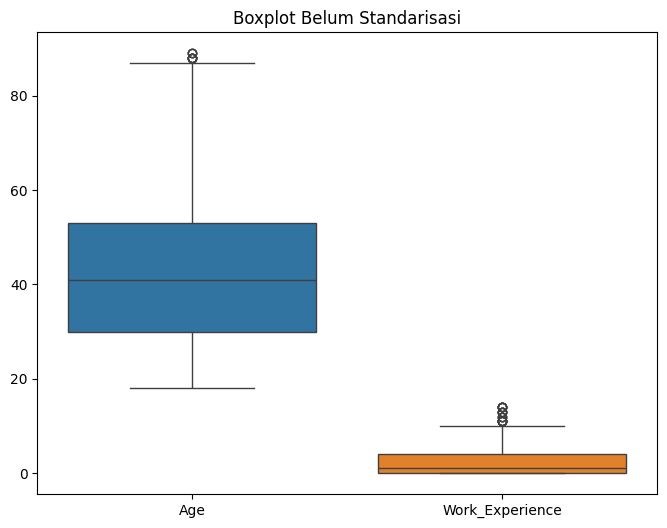

,Age,Work_Experience
0,36,0.0
1,37,8.0
3,59,11.0
5,47,0.0
6,61,5.0
...,...,...
995,49,1.0
996,56,1.0
997,83,8.0
999,63,5.0


In [63]:
# Menampilkan visualisasi perbandingan dari Age dan Work Experience
plt.figure(figsize=(8,6))
sns.boxplot(data=pd.DataFrame(df_clean, columns=[ 'Age', 'Work_Experience']))
plt.title("Boxplot Belum Standarisasi")
plt.show()
# Selanjutnya, kita hanya akan menggunakan data dengan kolom age dan work experience
df_train = df_clean[kolom_2]
df_train

In [64]:
#standarisasi karena nilai age dan work experience jauh perbandingannya
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean[['Age', 'Work_Experience']])
df_scaled

array([[-0.46022575, -0.76552109],
       [-0.40151714,  1.56224352],
       [ 0.89007236,  2.43515525],
       ...,
       [ 2.29907908,  1.56224352],
       [ 1.12490681,  0.68933179],
       [ 1.59457572, -0.47455052]])

In [65]:
df_scaled = pd.DataFrame(df_scaled, columns=['Age', 'Work_Experience'])
df_scaled.describe()


,Age,Work_Experience
count,8.020000e+02,8.020000e+02
mean,-6.201745e-17,1.771927e-17
std,1.000624e+00,1.000624e+00
min,-1.516981e+00,-7.655211e-01
25%,-8.124774e-01,-7.655211e-01
50%,-1.666827e-01,-4.745505e-01
75%,5.378207e-01,3.983612e-01
max,2.651331e+00,3.308067e+00


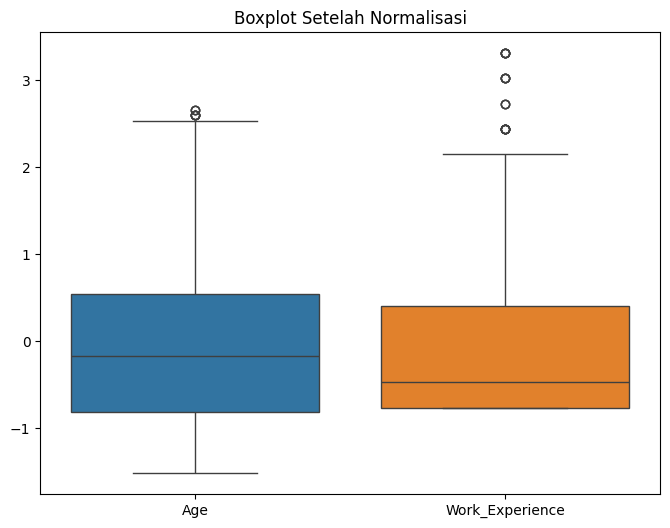

In [67]:

#visualisasi setelah standarisasi
plt.figure(figsize=(8,6))
sns.boxplot(data=df_scaled)
plt.title("Boxplot Setelah Normalisasi")
plt.show()


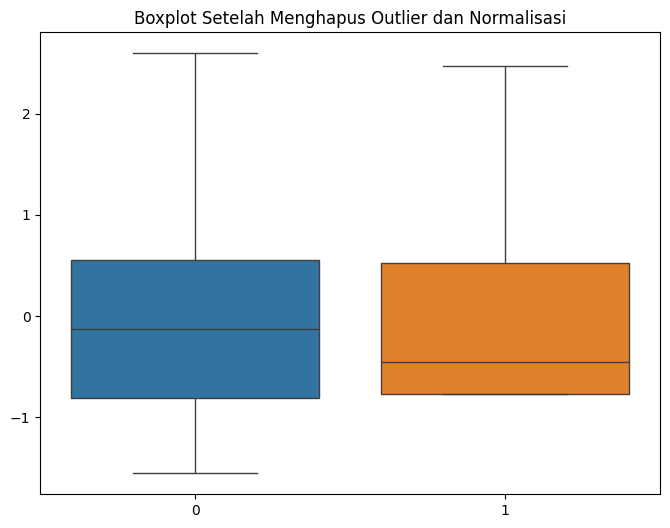

In [70]:
# 1. Hapus outlier terlebih dahulu
for col in ['Age', 'Work_Experience']:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

# 2. Lakukan standarisasi setelah outlier dihapus
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean[['Age', 'Work_Experience']])

# 3. Visualisasi dengan boxplot
plt.figure(figsize=(8,6))
sns.boxplot(data=df_scaled)
plt.title("Boxplot Setelah Menghapus Outlier dan Normalisasi")
plt.show()


In [75]:
# Mengubah hasil scaling menjadi DataFrame agar lebih mudah dibaca
df_train = df_scaled_df.copy()
df_train = pd.DataFrame(df_scaled, columns=['Age', 'Work_Experience'])
df_train

,Age,Work_Experience
0,-0.439569,-0.775922
1,-0.377573,1.825524
2,0.242384,-0.775922
3,1.110324,0.849982
4,0.242384,-0.450742
...,...,...
759,0.366375,-0.450742
760,0.800345,-0.450742
761,2.474230,1.825524
762,1.234315,0.849982


In [76]:
# Sekarang kita coba clustering data menggunakan KMeans
# Tapi sebelum itu, kita tentukan nilai K yang paling optimum dengan Elbow Method dan Silhouette Score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss = []
scores = []
for i in range(2, 10):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    km.fit(df_train)
    wcss.append(km.inertia_)

    labels = km.labels_
    silhouette_avg = silhouette_score(df_train, labels)
    scores.append(silhouette_avg)
    print('wcss score for n_cluster = ' + str(i) + ' is ' + str(wcss))
    print('silhoutte score for n_clusters = ' + str(i) + ' is ' + str(silhouette_avg))

wcss score for n_cluster = 2 is [831.6251995578001]
silhoutte score for n_clusters = 2 is 0.49624678485475593
wcss score for n_cluster = 3 is [831.6251995578001, 395.2722011660747]
silhoutte score for n_clusters = 3 is 0.5024491689371476
wcss score for n_cluster = 4 is [831.6251995578001, 395.2722011660747, 269.3879809881025]
silhoutte score for n_clusters = 4 is 0.4883850617385736
wcss score for n_cluster = 5 is [831.6251995578001, 395.2722011660747, 269.3879809881025, 222.84713001163243]
silhoutte score for n_clusters = 5 is 0.4618628631969615
wcss score for n_cluster = 6 is [831.6251995578001, 395.2722011660747, 269.3879809881025, 222.84713001163243, 188.92824134931337]
silhoutte score for n_clusters = 6 is 0.3971974039309699
wcss score for n_cluster = 7 is [831.6251995578001, 395.2722011660747, 269.3879809881025, 222.84713001163243, 188.92824134931337, 153.53643943140213]
silhoutte score for n_clusters = 7 is 0.43267997537934794
wcss score for n_cluster = 8 is [831.6251995578001, 3

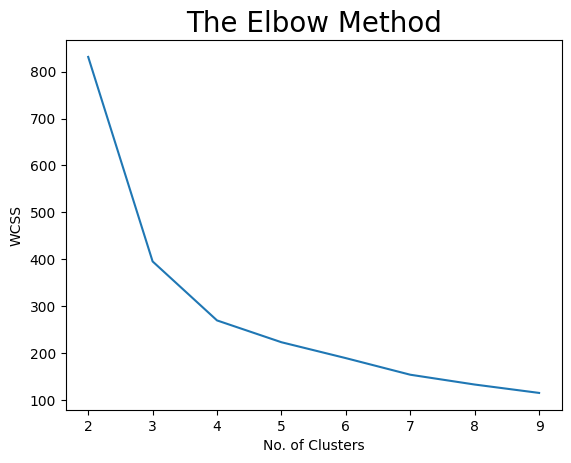

In [33]:
# Visualisasi Elbow Method
plt.plot(range(2, 10), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

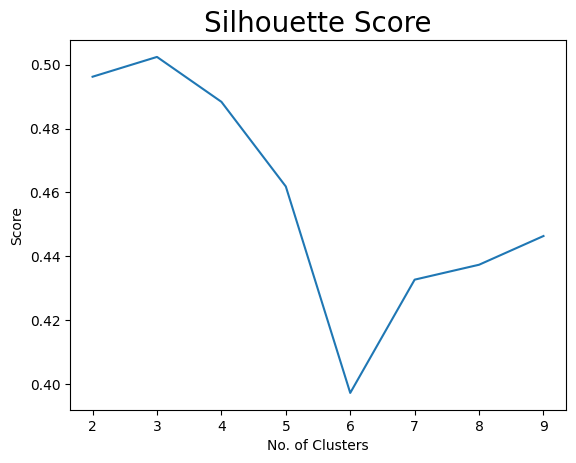

In [77]:
# Visualisasi Silhouette Score
plt.plot(range(2, 10), scores)
plt.title('Silhouette Score', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Score')
plt.show()

In [78]:
# Dari Elbow Method dan Sillhouette Score, kita akan menggunakan K = 3
kmeansmodel = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
y_kmeans= kmeansmodel.fit_predict(df_train)

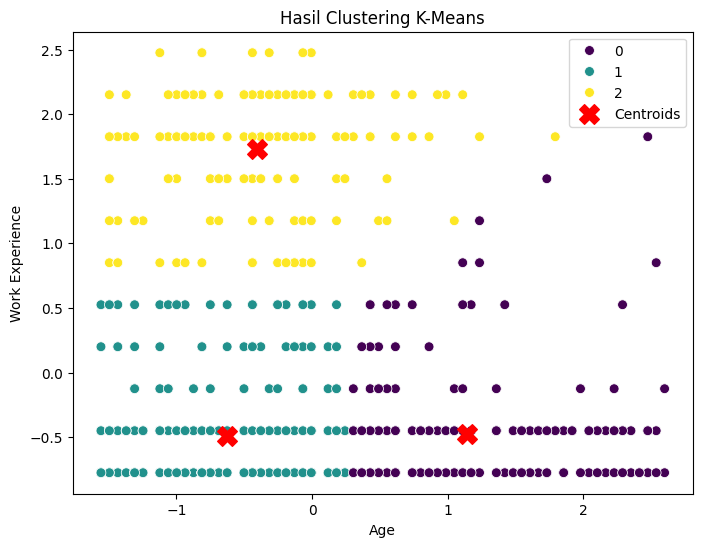

In [80]:

# Tambahkan hasil clustering ke dalam dataframe
df_train['Cluster'] = y_kmeans

# Visualisasi hasil clustering dengan scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_train['Age'], y=df_train['Work_Experience'], hue=df_train['Cluster'], palette='viridis', s=50)

# Menampilkan centroid
centroids = kmeansmodel.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')

plt.title('Hasil Clustering K-Means')
plt.xlabel('Age')
plt.ylabel('Work Experience')
plt.legend()
plt.show()

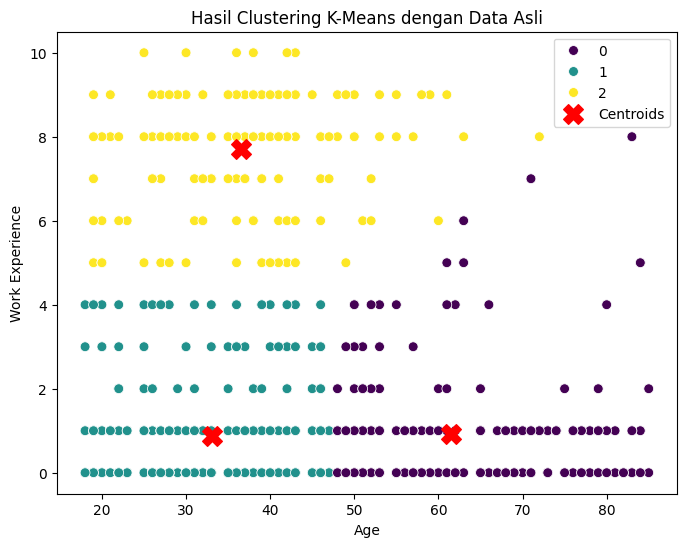

In [81]:
# Mengembalikan nilai asli hanya untuk fitur yang digunakan (Age, Work_Experience)
df_original_values = scaler.inverse_transform(df_train[['Age', 'Work_Experience']])

# Konversi kembali ke DataFrame dengan nama kolom yang benar
df_original_values = pd.DataFrame(df_original_values, columns=['Age', 'Work_Experience'])

# Tambahkan kolom cluster kembali
df_original_values['Cluster'] = df_train['Cluster']

# Mengembalikan centroid ke skala asli (hanya untuk 2 kolom yang digunakan)
centroids_original = scaler.inverse_transform(kmeansmodel.cluster_centers_[:, :2])

# Visualisasi hasil clustering dengan nilai asli
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_original_values['Age'], y=df_original_values['Work_Experience'],
                hue=df_original_values['Cluster'], palette='viridis', s=50)

# Menampilkan centroid dalam nilai asli
plt.scatter(centroids_original[:, 0], centroids_original[:, 1],
            marker='X', s=200, c='red', label='Centroids')

plt.title('Hasil Clustering K-Means dengan Data Asli')
plt.xlabel('Age')
plt.ylabel('Work Experience')
plt.legend()
plt.show()


In [82]:
from sklearn.cluster import AgglomerativeClustering

linkage_col = ['ward', 'complete', 'average', 'single']
scores_all = [[] for _ in range(len(linkage_col))]
for j in range (len(linkage_col)):
    print('Linkage: ', linkage_col[j])
    scores = []
    for i in range(2, 10):
        AC = AgglomerativeClustering(n_clusters=i, linkage = linkage_col[j]) # Menggunakan Ward Method
        AC.fit(df_train)

        labels = AC.labels_
        silhouette_avg = silhouette_score(df_train, labels)
        scores.append(silhouette_avg)
        print('silhoutte score for n_clusters = ' + str(i) + ' is ' + str(silhouette_avg))
    print("\n##########################\n")
    scores_all[j] = scores

Linkage:  ward
silhoutte score for n_clusters = 2 is 0.5304709297700471
silhoutte score for n_clusters = 3 is 0.5882273758144106
silhoutte score for n_clusters = 4 is 0.5436504154563688
silhoutte score for n_clusters = 5 is 0.4564797181458282
silhoutte score for n_clusters = 6 is 0.4027714659299153
silhoutte score for n_clusters = 7 is 0.44401725354478633
silhoutte score for n_clusters = 8 is 0.46324422996278564
silhoutte score for n_clusters = 9 is 0.4320953966495243

##########################

Linkage:  complete
silhoutte score for n_clusters = 2 is 0.43076731911309624
silhoutte score for n_clusters = 3 is 0.35657432163431113
silhoutte score for n_clusters = 4 is 0.5565850934931511
silhoutte score for n_clusters = 5 is 0.5126963222321347
silhoutte score for n_clusters = 6 is 0.48631813843026483
silhoutte score for n_clusters = 7 is 0.4705462995488449
silhoutte score for n_clusters = 8 is 0.41963020094828823
silhoutte score for n_clusters = 9 is 0.41608723618796517

#################

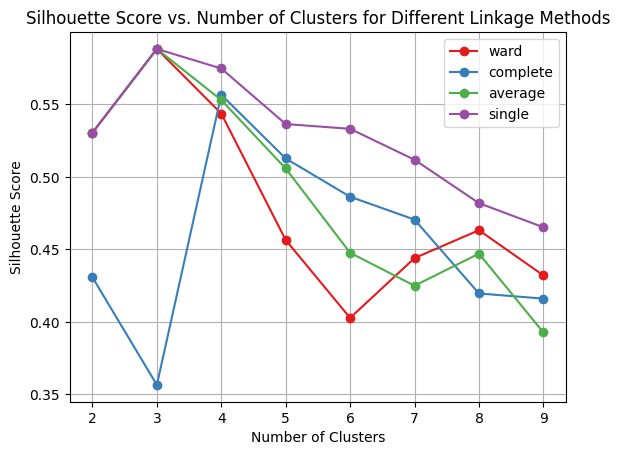

In [84]:
colors = sns.color_palette("Set1", len(linkage_col))

for j in range(len(linkage_col)):
    plt.plot(range(2, 10), scores_all[j], marker='o', color=colors[j], label=linkage_col[j])

plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters for Different Linkage Methods')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Mengembalikan nilai asli hanya untuk fitur yang digunakan (Age, Work_Experience)
df_original_values = scaler.inverse_transform(df_train[['Age', 'Work_Experience']])

# Konversi kembali ke DataFrame dengan nama kolom yang benar
df_original_values = pd.DataFrame(df_original_values, columns=['Age', 'Work_Experience'])

# Tambahkan kolom cluster kembali
df_original_values['Cluster'] = df_train['Cluster']

# Mengembalikan centroid ke skala asli (hanya untuk 2 kolom yang digunakan)
centroids_original = scaler.inverse_transform(kmeansmodel.cluster_centers_[:, :2])

# Visualisasi hasil clustering dengan nilai asli
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_original_values['Age'], y=df_original_values['Work_Experience'],
                hue=df_original_values['Cluster'], palette='viridis', s=50)

# Menampilkan centroid dalam nilai asli
plt.scatter(centroids_original[:, 0], centroids_original[:, 1],
            marker='X', s=200, c='red', label='Centroids')

plt.title('Hasil Clustering K-Means dengan Data Asli')
plt.xlabel('Age')
plt.ylabel('Work Experience')
plt.legend()
plt.show()


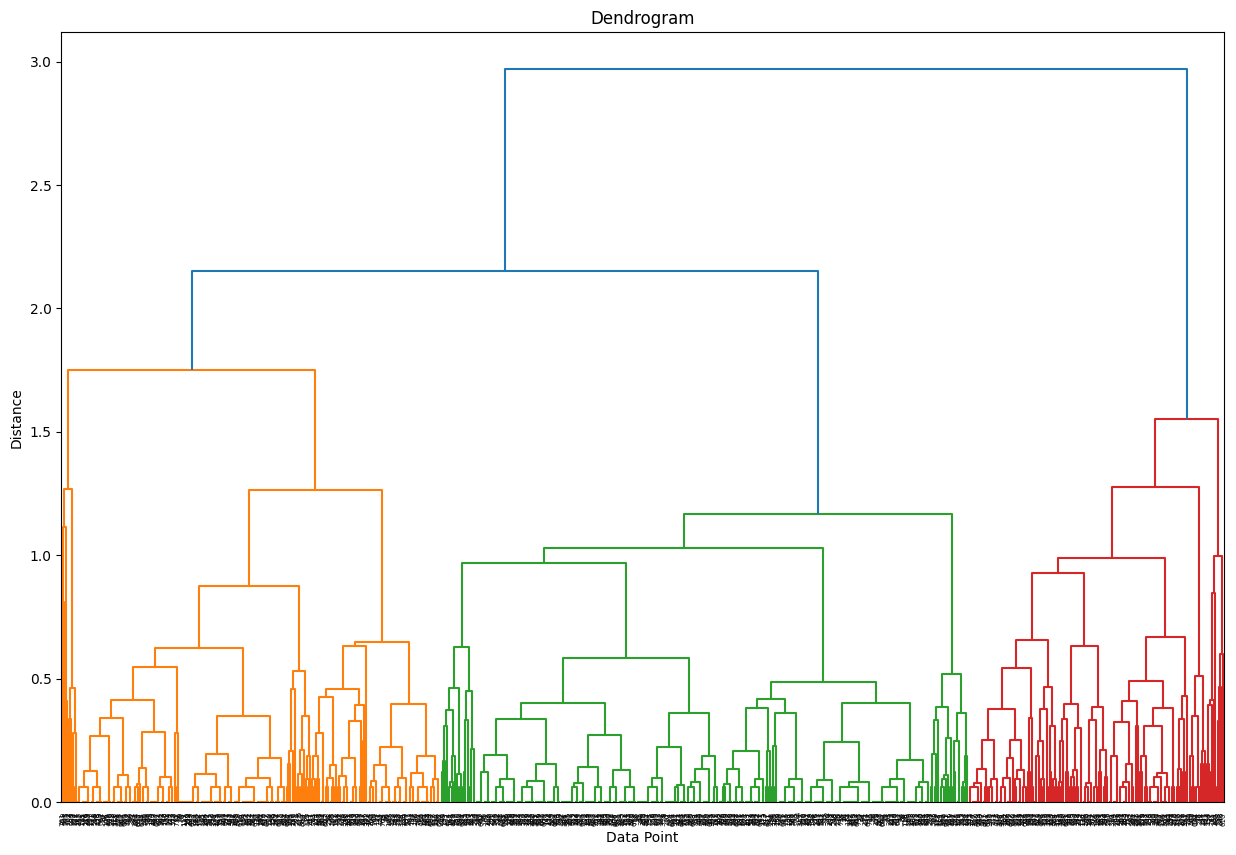

In [85]:
import scipy.cluster.hierarchy as sch

linked = sch.linkage(df_train, 'average')


plt.figure(figsize=(15, 10))
dendrogram = sch.dendrogram(linked, orientation='top',distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Data Point')
plt.ylabel('Distance')
plt.axhline(y=1500, color='black', linestyle='--') # at this point, will divide the data into 3 clusters
plt.show()

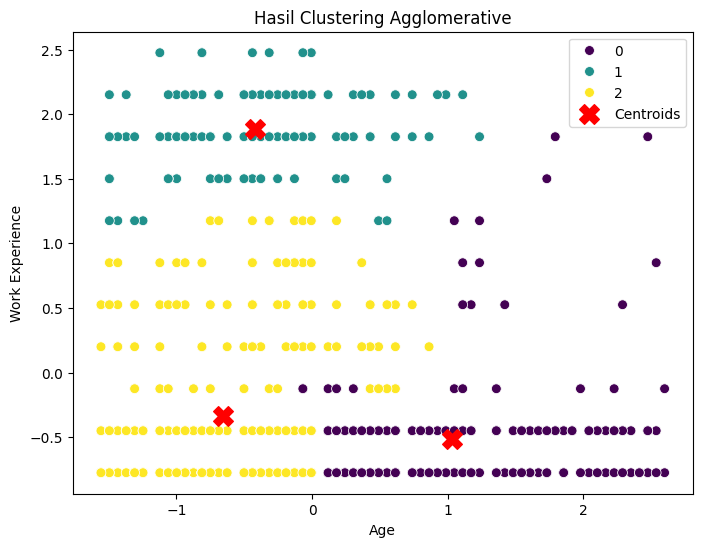

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import AgglomerativeClustering

# Menggunakan Agglomerative Clustering dengan metode linkage terbaik (misalnya 'ward')
best_linkage = 'ward'  # Ganti dengan metode linkage yang memiliki silhouette score tertinggi
best_n_clusters = 3  # Sesuaikan dengan jumlah cluster optimal

agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage)
df_train['Cluster'] = agglo.fit_predict(df_train[['Age', 'Work_Experience']])

# Visualisasi hasil clustering dengan scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_train['Age'], y=df_train['Work_Experience'], hue=df_train['Cluster'], palette='viridis', s=50)

# Centroid dengan rata-rata setiap cluster
centroids = df_train.groupby('Cluster')[['Age', 'Work_Experience']].mean().values
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')

plt.title('Hasil Clustering Agglomerative')
plt.xlabel('Age')
plt.ylabel('Work Experience')
plt.legend()
plt.show()
